In [1]:
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

In [2]:
fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

In [3]:
start_date = 1443571200
end_date = 9999999999
period = 7200 * 12

# data = [{currency_pair: "USDT_BTC"}, {currency_pair: "USDT_ETH"}]

currency_pairs = ["USDT_BTC", "USDT_ETH"]

In [4]:
responses = []
outputs = []
inputs = []

In [5]:
for currency_pair in currency_pairs:
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=" + currency_pair + "&start=" + str(start_date) + "&end=" + str(end_date) + "&period="+ str(period)
    responses.append(requests.get(url).json())

In [6]:
def get_prev_n(index, array, n):
    return array[index - n:index]

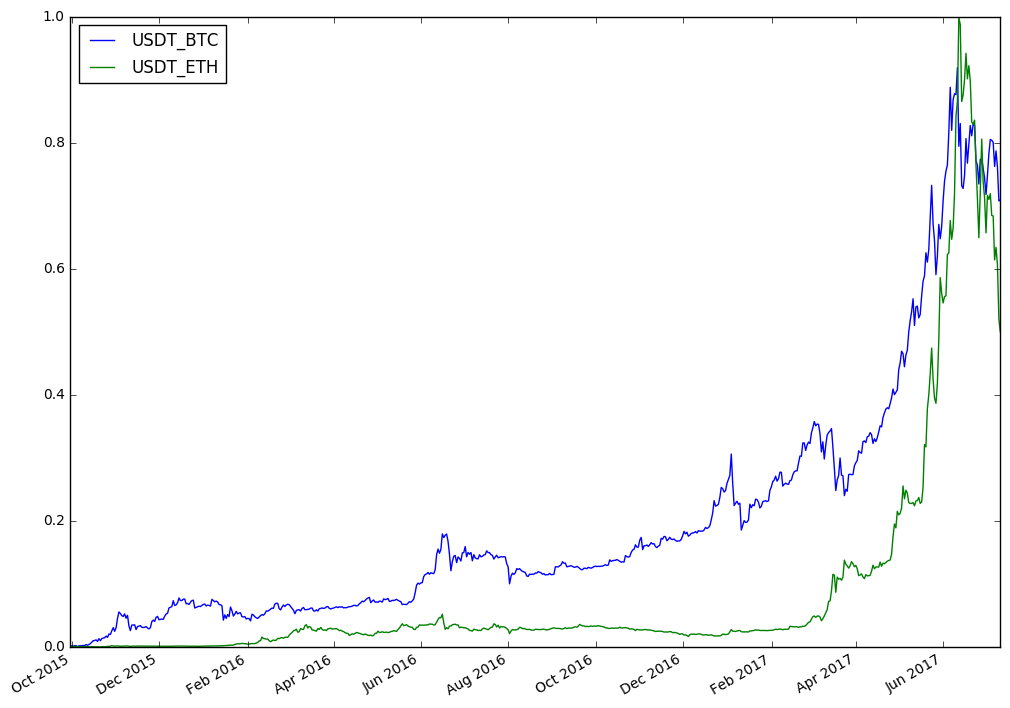

In [7]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%dd')

num_inputs = 20

for i, currency_pair in enumerate(currency_pairs):
    
    r = responses[i]
    closing_prices = np.asarray([item["close"] for item in r])
    normalized_closing_prices = closing_prices/closing_prices.max()
    normalized_closing_prices = normalized_closing_prices - normalized_closing_prices.min()
    ax.plot([datetime.datetime.fromtimestamp(item["date"]) for item in r], normalized_closing_prices, label=currency_pair)
    plt.legend(loc='upper left')
    
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    inputs.append([get_prev_n(index, closing_prices, num_inputs) for index, item in enumerate(closing_prices)])

    outputs.append([1 if x > np.mean(np.ediff1d(closing_prices)) else 0 for x in np.ediff1d(closing_prices)])

plt.show()
    

In [8]:
np.corrcoef([x["close"] for x in responses[0]], [x["close"] for x in responses[1]])

array([[ 1.        ,  0.90677292],
       [ 0.90677292,  1.        ]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense

ImportError: No module named 'keras'

In [92]:
model = Sequential()
model.add(Dense(12, input_dim=num_inputs, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_ = np.asarray(inputs[0][num_inputs + 1:])
Y_ = (outputs[1][num_inputs:])

training_size = len(X_) * 80 // 100
testing_size = len(X_) - training_size

In [93]:
X = X_[num_inputs:training_size]
Y = Y_[num_inputs:training_size]
X_test = X_[training_size:]
Y_test = Y_[training_size:]

In [94]:
model.fit(X, Y, epochs=300 * 2, batch_size=10)

Epoch 1/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 2/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 3/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 4/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 5/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 6/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 7/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 8/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 9/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 10/600
475/475 [==============================] - 0s - loss: 13.5930 - acc: 0.1474     
Epoch 11/600
475/475 [==============================] - 0s - loss: 13

In [95]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/124 [======>.......................] - ETA: 0s
acc: 52.42%
